In [49]:
import sys; sys.path.append("../")

import matplotlib.pylab as plt
import numpy as np
from pareto_clustering.dependencies.matlab import generate_poisson_dataset
from pareto_clustering.cluster.build_S_PCHA import Build_S
from pareto_clustering.cluster import cluster_Infomap
from pareto_clustering.cluster import cluster_DBSCAN

In [4]:
def compute_accuracy(labels_sim, pred_communities):
    
    # Get true pairs
    true_pairs = set()

    for i in range(1, dim+1):
        for j in range(1, dim+1):
            if j <= i: continue
            true_pairs.add((i,j,0))

    for i,_ in enumerate(labels_sim):
        start_index = int(sum(labels_sim[:i]))
        v = range(start_index+1, start_index+int(labels_sim[i])+1)
        for i in v:
            for j in v:
                if j <= i: continue
                true_pairs.remove((i,j,0))
                true_pairs.add((i,j,1))


    # Compute get predicted pairs
    pred_pairs = set()

    for i in range(1, dim+1):
        for j in range(1, dim+1):
            if j <= i: continue
            pred_pairs.add((i,j,0))

    for k,v in pred_communities.items():
        for i in v:
            for j in v:
                if j <= i: continue
                pred_pairs.remove((i,j,0))
                pred_pairs.add((i,j,1))
    
    
    # Return number of intersections divided by number of pairs
    return len(pred_pairs & true_pairs) * 1.0/len(true_pairs)


def generatePoissonDataset(lam, dimensions, num_points, noise, minsize=2):
    
    def _sample_points_in_simplex(simp, num_points, noise):
        d = simp.shape[1]
        A = np.random.rand(d,num_points); A.sort(axis=0); A = A.T
        A = np.hstack([np.zeros((num_points,1)), A, np.ones((num_points,1))])
        A = A[:, range(1,d+2)] - A[:, range(d+1)]
        return np.dot(A,simp) + np.dot(noise,(np.random.rand(num_points,d)-0.5))

    dtot = 0
    while dtot < dimensions:
        d = np.random.poisson(lam) + minsize
        
        if dtot+d >= dimensions-minsize:
            d = dimensions - dtot
        elif dtot+d > dimensions:
            d = dtot - dimensions
            
        if 'A' in locals():
            A = np.hstack([A, _sample_points_in_simplex(np.random.rand(d+1,d), num_points, noise)])
            div.append(d)
        else:
            A = _sample_points_in_simplex(np.random.rand(d+1,d), num_points, noise)
            div = [d]
            
        dtot += d
        
    return A, div

# Full pipeline in loop

In [3]:
glob_counter = 0
accuracy_arr = []

In [ ]:
num_iter = 11
dim = 100
N = 1000

for noise_level in np.linspace(0,1,num_iter):
    
    print "simulating for noise level", noise_level
    if noise_level*10 < glob_counter:
        print "skipping"; continue
    
    # Generate data
    X_sim, labels_sim = generatePoissonDataset(4,dim,N,noise_level)
    
    # Compute T-matrix
    _, T, _ = Build_S(X_sim,2,sample_size=1.0, remove_outliers=False).main(visualize=False)
    
    # Find communities
    pred_communities = cluster_Infomap.fit(T)
    
    # Compute accuracy
    accuracy = compute_accuracy(labels_sim, pred_communities)
    accuracy_arr.append(accuracy)
    
    glob_counter += 1

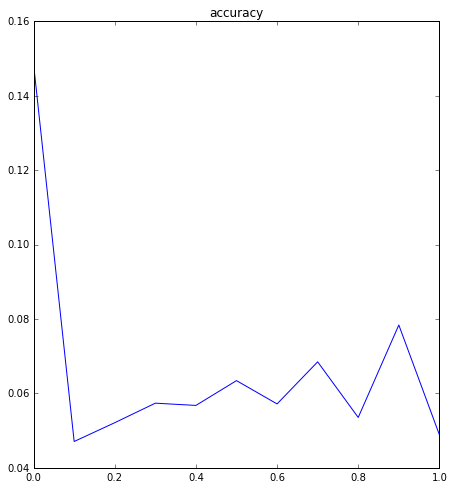

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(np.linspace(0,1,11),accuracy_arr)

plt.show()

In [6]:
%matplotlib inline
import pandas as pd
dims = 1000000
X_sim, labels_sim = generatePoissonDataset(3,10,dims,0.0)
print labels_sim

[6, 4]


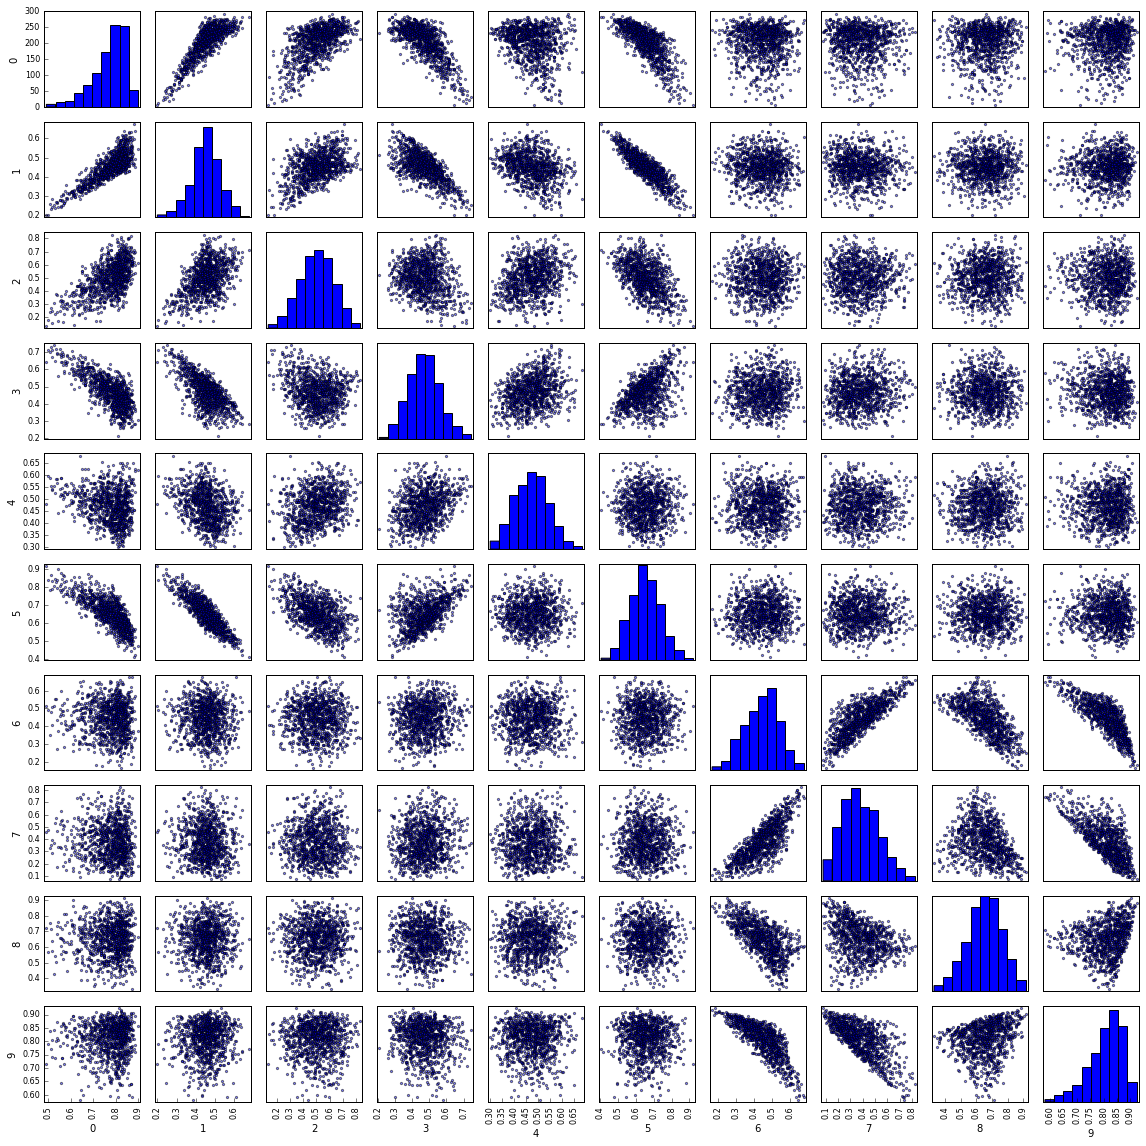

In [7]:
randrows = np.random.randint(0,dims,1000)
df = pd.DataFrame(X_sim[randrows,:])
pd.tools.plotting.scatter_matrix(df, figsize=(16,16))
plt.tight_layout()

In [11]:
%matplotlib qt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

In [24]:
features = range(6)
X_sim_subs = X_sim[:,features]
pca = PCA(n_components=len(features)).fit(X_sim_subs)
X = pca.transform(X_sim_subs)

<IPython.core.display.Javascript object>


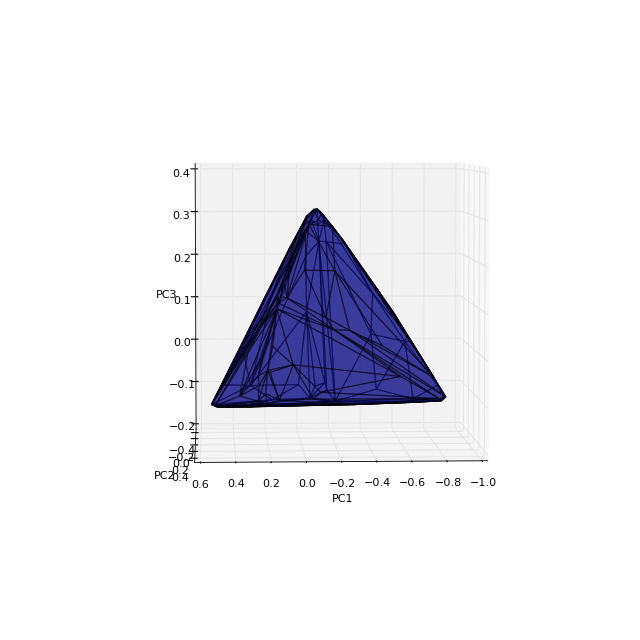

In [34]:
pcs = [0,1,2]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
hull = ConvexHull(X[:,pcs])
for i in hull.simplices:
    ax.plot_trisurf(X[i,pcs[0]], X[i,pcs[1]], X[i,pcs[2]], alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
#ax.scatter(X[randrows,0], X[randrows,1], X[randrows,3])
plt.show()

In [1]:
### DEBUGGING

import sys; sys.path.append("../")

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from pareto_clustering.dependencies.matlab import generate_poisson_dataset
from pareto_clustering.cluster.build_S_PCHA import Build_S
from pareto_clustering.cluster import cluster_Infomap
from pareto_clustering.cluster import cluster_DBSCAN


def generatePoissonDataset(lam, dimensions, num_points, noise, minsize=2):
    
    def _sample_points_in_simplex(simp, num_points, noise):
        d = simp.shape[1]
        A = np.random.rand(d,num_points); A.sort(axis=0); A = A.T
        A = np.hstack([np.zeros((num_points,1)), A, np.ones((num_points,1))])
        A = A[:, range(1,d+2)] - A[:, range(d+1)]
        return np.dot(A,simp) + np.dot(noise,(np.random.rand(num_points,d)-0.5))

    dtot = 0
    while dtot < dimensions:
        d = np.random.poisson(lam) + minsize
        
        if dtot+d >= dimensions-minsize:
            d = dimensions - dtot
        elif dtot+d > dimensions:
            d = dtot - dimensions
            
        if 'A' in locals():
            A = np.hstack([A, _sample_points_in_simplex(np.random.rand(d+1,d), num_points, noise)])
            div.append(d)
        else:
            A = _sample_points_in_simplex(np.random.rand(d+1,d), num_points, noise)
            div = [d]
            
        dtot += d
        
    return A, div

0 1 0
0 1 1
0 2 0
0 2 1
0 3 0
0 3 1
0 4 0
0 4 1
0 5 0
0 5 1
0 6 0
0 6 1
0 7 0
0 7 1
0% 7/666
0 8 0
0 8 1
0 9 0
0 9 1
0 10 0
0 10 1
0 11 0
0 11 1
0 12 0
0 12 1
0 13 0
0 13 1
0 14 0
0 14 1
0 15 0
0 15 1
0 16 0
0 16 1
0 17 0
0 17 1
0 18 0
0 18 1
0 19 0
0 19 1
0 20 0
0 20 1
0 21 0
0 21 1
0 22 0
0 22 1
0 23 0
0 23 1
0 24 0
0 24 1
0 25 0
0 25 1
0 26 0
0 26 1
Initialization does not converge. Too few examples in dataset.
Failed for: orig


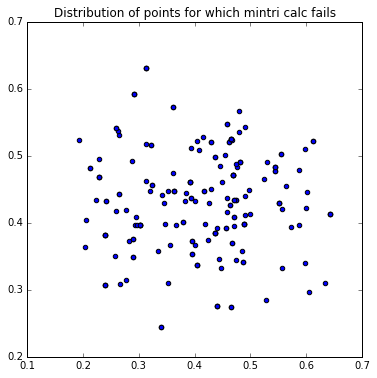

0 26 2
0 27 0
0 27 1
0 28 0
0 28 1
0 29 0
0 29 1
0 30 0
0 30 1
0 31 0
0 31 1
0 32 0
0 32 1
0 33 0
0 33 1
0 34 0
0 34 1
0 35 0
0 35 1
0 36 0
0 36 1
1 2 0
1 2 1
1 3 0
1 3 1
1 4 0
1 4 1
1 5 0
1 5 1
1 6 0
1 6 1
1 7 0
1 7 1
1 8 0
1 8 1
1 9 0
1 9 1
1 10 0
1 10 1
1 11 0
1 11 1
1 12 0
1 12 1
1 13 0
1 13 1
1 14 0
1 14 1
1 15 0
1 15 1
1 16 0
1 16 1
1 17 0
1 17 1
1 18 0
1 18 1
1 19 0
1 19 1
1 20 0
1 20 1
1 21 0
1 21 1
1 22 0
1 22 1
1 23 0
1 23 1
1 24 0
1 24 1
1 25 0
1 25 1
1 26 0
1 26 1
1 27 0
1 27 1
1 28 0
1 28 1
1 29 0
1 29 1
1 30 0
1 30 1
1 31 0
1 31 1
1 32 0
1 32 1
1 33 0
1 33 1
1 34 0
1 34 1
1 35 0
1 35 1
1 36 0
1 36 1
2 3 0
2 3 1
2 4 0
2 4 1
2 5 0
2 5 1
10% 74/666
2 6 0
2 6 1
2 7 0
2 7 1
2 8 0
2 8 1
2 9 0
2 9 1
2 10 0
2 10 1
2 11 0
2 11 1
2 12 0
2 12 1
2 13 0
2 13 1
2 14 0
2 14 1
2 15 0
2 15 1
2 16 0
2 16 1
2 17 0
2 17 1
2 18 0
2 18 1
2 19 0
2 19 1
2 20 0
2 20 1
2 21 0
2 21 1
2 22 0
2 22 1
2 23 0
2 23 1
2 24 0
2 24 1
2 25 0
2 25 1
2 26 0
2 26 1
2 27 0
2 27 1
2 28 0
2 28 1
2 29 0
2 29 1
2 30

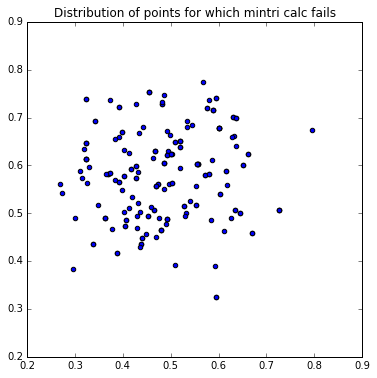

4 18 2
4 19 0
4 19 1
4 20 0
4 20 1
4 21 0
4 21 1
4 22 0
4 22 1
4 23 0
4 23 1
4 24 0
4 24 1
4 25 0
4 25 1
4 26 0
4 26 1
4 27 0
4 27 1
4 28 0
4 28 1
4 29 0
4 29 1
4 30 0
4 30 1
4 31 0
4 31 1
4 32 0
4 32 1
4 33 0
4 33 1
4 34 0
4 34 1
4 35 0
4 35 1
4 36 0
4 36 1
5 6 0
5 6 1
5 7 0
5 7 1
5 8 0
5 8 1
5 9 0
5 9 1
5 10 0
5 10 1
5 11 0
5 11 1
5 12 0
5 12 1
5 13 0
5 13 1
5 14 0
5 14 1
5 15 0
5 15 1
5 16 0
5 16 1
5 17 0
5 17 1
5 18 0
5 18 1
5 19 0
5 19 1
5 20 0
5 20 1
5 21 0
5 21 1
5 22 0
5 22 1
5 23 0
5 23 1
5 24 0
5 24 1
5 25 0
5 25 1
5 26 0
5 26 1
5 27 0
5 27 1
5 28 0
5 28 1
5 29 0
5 29 1
5 30 0
5 30 1
5 31 0
5 31 1
5 32 0
5 32 1
5 33 0
5 33 1
5 34 0
5 34 1
5 35 0
5 35 1
5 36 0
5 36 1
6 7 0
6 7 1
6 8 0
6 8 1
6 9 0
6 9 1
6 10 0
6 10 1
6 11 0
6 11 1
6 12 0
6 12 1
30% 207/666
6 13 0
6 13 1
6 14 0
6 14 1
6 15 0
6 15 1
6 16 0
6 16 1
6 17 0
6 17 1
6 18 0
6 18 1
6 19 0
6 19 1
6 20 0
6 20 1
6 21 0
6 21 1
6 22 0
6 22 1
6 23 0
6 23 1
6 24 0
6 24 1
6 25 0
6 25 1
6 26 0
6 26 1
6 27 0
6 27 1
6 28 0
6 28 1
6

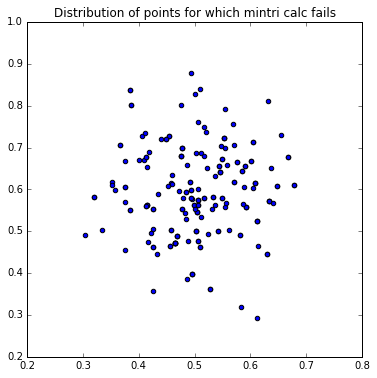

8 19 2
8 20 0
8 20 1
8 21 0
8 21 1
8 22 0
8 22 1
40% 274/666
8 23 0
8 23 1
8 24 0
8 24 1
8 25 0
8 25 1
8 26 0
8 26 1
8 27 0
8 27 1
8 28 0
8 28 1
8 29 0
8 29 1
8 30 0
8 30 1
8 31 0
8 31 1
8 32 0
8 32 1
8 33 0
8 33 1
8 34 0
8 34 1
8 35 0
8 35 1
8 36 0
8 36 1
9 10 0
9 10 1
9 11 0
9 11 1
9 12 0
9 12 1
9 13 0
9 13 1
9 14 0
9 14 1
9 15 0
9 15 1
9 16 0
9 16 1
9 17 0
9 17 1
9 18 0
9 18 1
9 19 0
9 19 1
9 20 0
9 20 1
9 21 0
9 21 1
9 22 0
9 22 1
9 23 0
9 23 1
9 24 0
9 24 1
9 25 0
9 25 1
9 26 0
9 26 1
9 27 0
9 27 1
9 28 0
9 28 1
9 29 0
9 29 1
9 30 0
9 30 1
9 31 0
9 31 1
9 32 0
9 32 1
9 33 0
9 33 1
9 34 0
9 34 1
9 35 0
9 35 1
9 36 0
9 36 1
10 11 0
10 11 1
10 12 0
10 12 1
10 13 0
10 13 1
10 14 0
10 14 1
10 15 0
10 15 1
10 16 0
10 16 1
10 17 0
10 17 1
10 18 0
10 18 1
10 19 0
10 19 1
10 20 0
10 20 1
10 21 0
10 21 1
Initialization does not converge. Too few examples in dataset.
Failed for: shuf


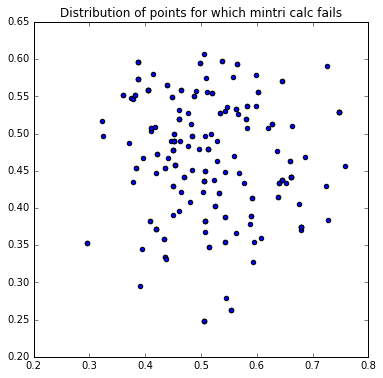

10 21 2
10 22 0
10 22 1
10 23 0
10 23 1
Initialization does not converge. Too few examples in dataset.
Failed for: orig


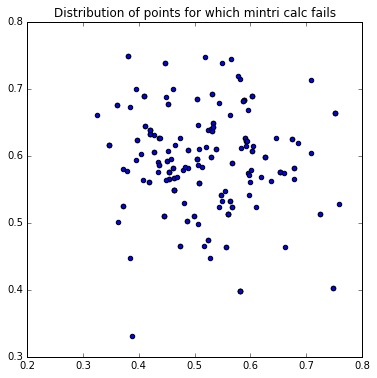

10 23 2
10 24 0
10 24 1
10 25 0
10 25 1
10 26 0
10 26 1
10 27 0
10 27 1
10 28 0
10 28 1
10 29 0
10 29 1
10 30 0
10 30 1
10 31 0
10 31 1
10 32 0
10 32 1
10 33 0
10 33 1
10 34 0
10 34 1
10 35 0
10 35 1
50% 340/666
10 36 0
10 36 1
11 12 0
11 12 1
11 13 0
11 13 1
11 14 0
11 14 1
11 15 0
11 15 1
11 16 0
11 16 1
11 17 0
11 17 1
11 18 0
11 18 1
11 19 0
11 19 1
11 20 0
11 20 1
11 21 0
11 21 1
11 22 0
11 22 1
11 23 0
11 23 1
11 24 0
11 24 1
11 25 0
11 25 1
11 26 0
11 26 1
11 27 0
11 27 1
11 28 0
11 28 1
11 29 0
11 29 1
11 30 0
11 30 1
11 31 0
11 31 1
11 32 0
11 32 1
11 33 0
11 33 1
11 34 0
11 34 1
11 35 0
11 35 1
11 36 0
11 36 1
12 13 0
12 13 1
12 14 0
12 14 1
12 15 0
12 15 1
12 16 0
12 16 1
12 17 0
12 17 1
12 18 0
12 18 1
12 19 0
12 19 1
12 20 0
12 20 1
12 21 0
12 21 1
12 22 0
12 22 1
12 23 0
12 23 1
12 24 0
12 24 1
12 25 0
12 25 1
12 26 0
12 26 1
12 27 0
12 27 1
12 28 0
12 28 1
12 29 0
12 29 1
12 30 0
12 30 1
12 31 0
12 31 1
12 32 0
12 32 1
12 33 0
12 33 1
12 34 0
12 34 1
12 35 0
12 35 1
12 3

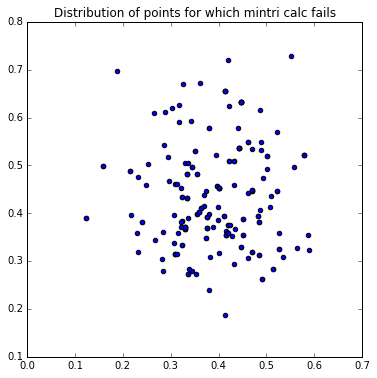

15 17 1
15 17 2
15 18 0
15 18 1
15 19 0
15 19 1
15 20 0
15 20 1
15 21 0
15 21 1
15 22 0
15 22 1
15 23 0
15 23 1
15 24 0
15 24 1
15 25 0
15 25 1
15 26 0
15 26 1
15 27 0
15 27 1
15 28 0
15 28 1
15 29 0
15 29 1
15 30 0
15 30 1
15 31 0
15 31 1
15 32 0
15 32 1
15 33 0
15 33 1
15 34 0
15 34 1
15 35 0
15 35 1
15 36 0
15 36 1
16 17 0
16 17 1
16 18 0
16 18 1
16 19 0
16 19 1
16 20 0
16 20 1
16 21 0
16 21 1
16 22 0
16 22 1
16 23 0
16 23 1
16 24 0
16 24 1
16 25 0
16 25 1
16 26 0
16 26 1
16 27 0
16 27 1
16 28 0
16 28 1
16 29 0
16 29 1
16 30 0
16 30 1
16 31 0
16 31 1
16 32 0
Initialization does not converge. Too few examples in dataset.
Failed for: shuf


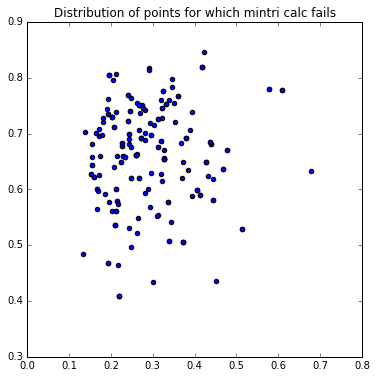

16 32 1
16 32 2
16 33 0
16 33 1
70% 473/666
16 34 0
16 34 1
16 35 0
16 35 1
16 36 0
16 36 1
17 18 0
17 18 1
17 19 0
17 19 1
17 20 0
17 20 1
17 21 0
17 21 1
17 22 0
17 22 1
17 23 0
17 23 1
17 24 0
17 24 1
17 25 0
17 25 1
17 26 0
17 26 1
17 27 0
17 27 1
17 28 0
17 28 1
17 29 0
17 29 1
17 30 0
17 30 1
17 31 0
17 31 1
17 32 0
17 32 1
17 33 0
17 33 1
17 34 0
17 34 1
17 35 0
17 35 1
17 36 0
17 36 1
18 19 0
18 19 1
18 20 0
18 20 1
18 21 0
18 21 1
18 22 0
18 22 1
18 23 0
18 23 1
18 24 0
18 24 1
18 25 0
18 25 1
18 26 0
18 26 1
18 27 0
18 27 1
18 28 0
18 28 1
18 29 0
18 29 1
18 30 0
18 30 1
18 31 0
18 31 1
18 32 0
18 32 1
18 33 0
18 33 1
18 34 0
18 34 1
18 35 0
18 35 1
18 36 0
18 36 1
19 20 0
19 20 1
19 21 0
19 21 1
19 22 0
19 22 1
19 23 0
19 23 1
19 24 0
19 24 1
19 25 0
19 25 1
19 26 0
19 26 1
19 27 0
19 27 1
19 28 0
19 28 1
19 29 0
19 29 1
19 30 0
19 30 1
19 31 0
19 31 1
19 32 0
19 32 1
19 33 0
19 33 1
19 34 0
19 34 1
19 35 0
19 35 1
19 36 0
19 36 1
20 21 0
20 21 1
20 22 0
20 22 1
20 23 0
20 2

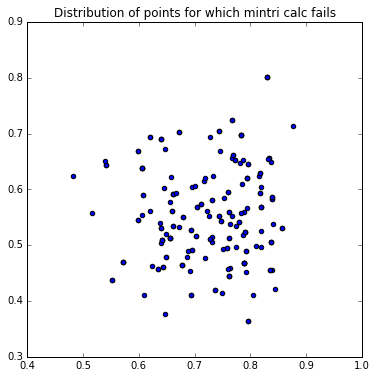

20 24 1
20 24 2
20 25 0
20 25 1
20 26 0
20 26 1
20 27 0
Initialization does not converge. Too few examples in dataset.
Failed for: orig


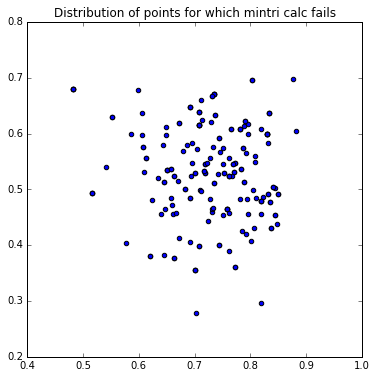

20 27 1
20 27 2
20 28 0
20 28 1
20 29 0
20 29 1
20 30 0
20 30 1
80% 540/666
20 31 0
20 31 1
20 32 0
20 32 1
20 33 0
20 33 1
20 34 0
20 34 1
20 35 0
20 35 1
20 36 0
20 36 1
21 22 0
21 22 1
21 23 0
21 23 1
21 24 0
21 24 1
21 25 0
21 25 1
21 26 0
21 26 1
21 27 0
21 27 1
21 28 0
21 28 1
21 29 0
21 29 1
21 30 0
21 30 1
21 31 0
21 31 1
21 32 0
21 32 1
21 33 0
21 33 1
21 34 0
21 34 1
21 35 0
21 35 1
21 36 0
21 36 1
22 23 0
22 23 1
22 24 0
22 24 1
22 25 0
22 25 1
22 26 0
22 26 1
22 27 0
22 27 1
22 28 0
22 28 1
22 29 0
22 29 1
22 30 0
Initialization does not converge. Too few examples in dataset.
Failed for: shuf


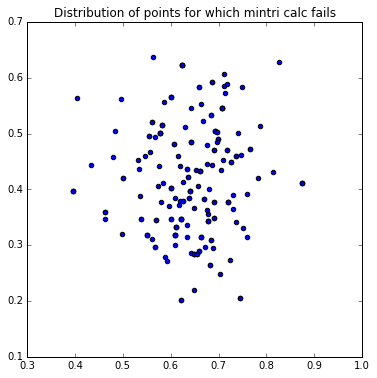

22 30 1
22 30 2
22 31 0
22 31 1
22 32 0
22 32 1
22 33 0
22 33 1
22 34 0
22 34 1
22 35 0
22 35 1
22 36 0
22 36 1
23 24 0
23 24 1
23 25 0
23 25 1
23 26 0
23 26 1
23 27 0
23 27 1
23 28 0
23 28 1
23 29 0
23 29 1
23 30 0
23 30 1
23 31 0
23 31 1
23 32 0
23 32 1
23 33 0
23 33 1
23 34 0
23 34 1
23 35 0
23 35 1
23 36 0
23 36 1
24 25 0
24 25 1
24 26 0
24 26 1
24 27 0
24 27 1
24 28 0
24 28 1
24 29 0
24 29 1
24 30 0
24 30 1
Initialization does not converge. Too few examples in dataset.
Failed for: shuf


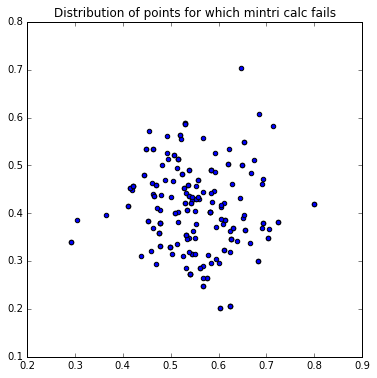

24 30 2
24 31 0
24 31 1
24 32 0
24 32 1
24 33 0
24 33 1
24 34 0
24 34 1
24 35 0
Initialization does not converge. Too few examples in dataset.
Failed for: shuf


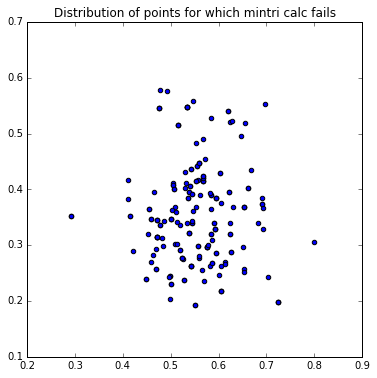

24 35 1
24 35 2
24 36 0
24 36 1
25 26 0
25 26 1
25 27 0
25 27 1
25 28 0
25 28 1
25 29 0
25 29 1
25 30 0
25 30 1
25 31 0
25 31 1
25 32 0
25 32 1
90% 607/666
25 33 0
25 33 1
25 34 0
25 34 1
25 35 0
25 35 1
25 36 0
25 36 1
26 27 0
26 27 1
26 28 0
26 28 1
26 29 0
26 29 1
26 30 0
26 30 1
26 31 0
26 31 1
26 32 0
26 32 1
26 33 0
26 33 1
26 34 0
26 34 1
26 35 0
26 35 1
26 36 0
26 36 1
27 28 0
27 28 1
27 29 0
27 29 1
27 30 0
27 30 1
27 31 0
27 31 1
27 32 0
27 32 1
27 33 0
27 33 1
27 34 0
27 34 1
Initialization does not converge. Too few examples in dataset.
Failed for: orig


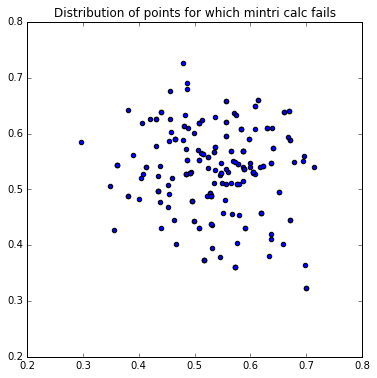

27 34 2
27 35 0
27 35 1
27 36 0
27 36 1
28 29 0
28 29 1
28 30 0
28 30 1
28 31 0
28 31 1
28 32 0
28 32 1
28 33 0
28 33 1
28 34 0
28 34 1
28 35 0
28 35 1
28 36 0
28 36 1
29 30 0
29 30 1
29 31 0
29 31 1
29 32 0
29 32 1
29 33 0
29 33 1
29 34 0
Initialization does not converge. Too few examples in dataset.
Failed for: shuf


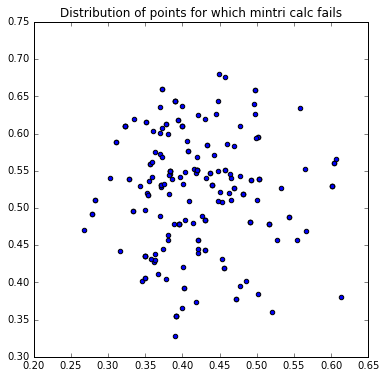

29 34 1
29 34 2
29 35 0
29 35 1
29 36 0
29 36 1
30 31 0
30 31 1
30 32 0
30 32 1
30 33 0
30 33 1
30 34 0
30 34 1
30 35 0
30 35 1
30 36 0
30 36 1
31 32 0
31 32 1
31 33 0
31 33 1
31 34 0
31 34 1
31 35 0
31 35 1
31 36 0
31 36 1
32 33 0
32 33 1
32 34 0
32 34 1
32 35 0
32 35 1
32 36 0
32 36 1
33 34 0
33 34 1
33 35 0
33 35 1
33 36 0
33 36 1
34 35 0
34 35 1
34 36 0
34 36 1
35 36 0
35 36 1
100% 666/666


NameError: global name 'Polygon' is not defined

In [2]:
dim = 37
N = 200

X_sim, labels_sim = generatePoissonDataset(4,dim,N,0)
_, T, _ = Build_S(X_sim, num_iter=2, sample_size=1.0, remove_outliers=False).main(visualize=True)
pred_communities = cluster_Infomap.fit(T)

In [5]:
accuracy = compute_accuracy(labels_sim, pred_communities)

In [6]:
print accuracy

0.127627627628


In [7]:
pred_communities

defaultdict(list,
            {1: [1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37]})